<h4> GYM DATA ANALYSIS</h4>

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline 
from datetime import date

In [1]:
import sys
import importlib
if 'kagglehub' in sys.modules:
    importlib.reload(sys.modules['kagglehub'])
else:
    import kagglehub


path = kagglehub.dataset_download("sumedh1507/fitness-and-workout-dataset")

print("Path to dataset files:", path) 

Path to dataset files: C:\Users\Anshika\.cache\kagglehub\datasets\sumedh1507\fitness-and-workout-dataset\versions\1


In [136]:
data= pd.read_csv('fitness_and_workout_dataset.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
data.head()

,title,description,level,goal,equipment,program_length,time_per_workout,total_exercises,created,last_edit
0,(MASS MONSTER) High Intensity 4 Day Upper Lower Program,Build tones of muscular with this high intensity 4 day upper lower workout routine.\n\nWeekly Setup:\nDay 1 - Upper Push Focus\nDay 2 - Lower Quad Focus\nDay 3 - Rest/Active Recovery\nDay 4 - Upper Pull Focus\nDay 5 - Rest/Active Recovery\nDay 6 - Lower Hamstring Focus\nDay 7 - Rest/Active Recovery \n\nMuscle Groups |Sets Per Week\nBack - 10\nShoulders - 10\nChest - 9\nQuads - 9\nHamstrings - 9\nGlutes - 9\nBiceps - 7\nTriceps - 7\nLower Back - 4\nCalves - 4\nAbs - 4,['Intermediate'],"['Muscle & Sculpting', 'Bodyweight Fitness']",Full Gym,12.0,90.0,384,2024-01-20 10:23:00,2025-06-29 12:39:00
1,(NOT MY PROGRAM)SHJ Jotaro,Build strength and size,"['Advanced', 'Intermediate']",['Bodybuilding'],Full Gym,8.0,60.0,224,2024-07-08 02:28:00,2025-06-18 09:15:00
2,1 PowerLift Per Day Powerbuilding 5 Day Bro Split,"Based off of Andy Baker's KCS (Kingwood Strength & Conditioning) Powerbuilding program.\n\nIt focuses on increasing strength on one lift per day, including squat, deadlift, bench press, overhead press, and pull-up. Rest days are after squat and deadlift days.\n\n1 - Shoulders & Triceps\n2 - Back\n3 - Quads & Calves\nRest\n4 - Chest & Biceps\n5 - Posterior Chain\nRest\n\nFit in Abs, extra calves & Cardio wherever you like.\n\nAt some point in a lifter's career, typically after the novice or early intermediate phase, the most reliable way to get stronger is to become more muscular, i.e. build muscle mass. To that end, the term ""powerbuilding"" has emerged to describe a hybrid approach of training the main barbell lifts (like a powerlifter) alongside a selection of supplemental lifts done for higher reps aimed at increasing muscular size (like a bodybuilder). \n\nWhile some people knock powerbuilding as merely a clever marketing term, a suboptimal way to train, the fact is that many of the strongest powerlifters of all time have trained with this approach: Ed Coan, Dan Green, Kirk Karwoski, and many others.. This uses gradually decreasing reps like 8/5/2 or 5/4/3 or 6/4/2, whatever you prefer for progressing the main lifts in the context of a five-day body part split. Repeat the 3 week cycle and increase your weight by at least 5 or 10 pounds.","['Beginner', 'Novice', 'Intermediate']","['Athletics', 'Powerlifting', 'Powerbuilding']",Full Gym,6.0,90.0,237,2025-04-23 09:21:00,2025-06-18 11:55:00
3,10 Week Mass Building Program,This workout is designed to increase your muscle mass as much as possible in 10 weeks. Works each muscle group hard once per week using mostly heavy compound exercises.\n\nhttps://www.muscleandstrength.com/workouts/10-week-mass-building-program.html,"['Intermediate', 'Advanced']",['Powerbuilding'],Garage Gym,10.0,70.0,280,2024-09-07 03:44:00,2025-06-18 08:01:00
4,10 week deadlift focus,Increase deadlift,"['Intermediate', 'Advanced']","['Powerbuilding', 'Powerlifting', 'Bodybuilding', 'Muscle & Sculpting']",Full Gym,10.0,80.0,356,2024-12-23 03:13:00,2025-06-18 12:19:00


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             2598 non-null   object 
 1   description       2594 non-null   object 
 2   level             2598 non-null   object 
 3   goal              2598 non-null   object 
 4   equipment         2597 non-null   object 
 5   program_length    2597 non-null   float64
 6   time_per_workout  2598 non-null   float64
 7   total_exercises   2598 non-null   int64  
 8   created           2597 non-null   object 
 9   last_edit         2596 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 203.1+ KB


In [2]:
#Cleaning the database

In [24]:
data= data.dropna()
df=data.copy()
df.drop(columns=['description','title'], inplace=True)

df['created'] = pd.to_datetime(df['created'])
df['last_edit'] = pd.to_datetime(df['last_edit'])

In [25]:
df['level'].unique()

array(["['Intermediate']", "['Advanced', 'Intermediate']",
       "['Beginner', 'Novice', 'Intermediate']",
       "['Intermediate', 'Advanced']", "['Novice', 'Intermediate']",
       "['Novice', 'Beginner']", "['Beginner', 'Novice']",
       "['Beginner', 'Intermediate', 'Novice']", "['Novice']",
       "['Beginner', 'Novice', 'Intermediate', 'Advanced']",
       "['Advanced', 'Intermediate', 'Novice']", "['Advanced']",
       "['Intermediate', 'Novice', 'Advanced', 'Beginner']",
       "['Intermediate', 'Advanced', 'Novice']",
       "['Novice', 'Intermediate', 'Beginner']",
       "['Intermediate', 'Beginner', 'Novice']",
       "['Novice', 'Intermediate', 'Advanced', 'Beginner']",
       "['Beginner']",
       "['Novice', 'Beginner', 'Intermediate', 'Advanced']",
       "['Intermediate', 'Novice']",
       "['Beginner', 'Advanced', 'Novice', 'Intermediate']",
       "['Intermediate', 'Beginner']",
       "['Novice', 'Intermediate', 'Advanced']",
       "['Intermediate', 'Novice', '

In [3]:
#Converting the 'level' and 'goal' into proper strings.

In [26]:
import ast
def clean(string):
    try:
        parsed_list =  ast.literal_eval(string) if isinstance(string,str) else string
        
    except ValueError:
         parsed_list = [item.strip().strip("'\"") for item in string[1:-1].split(',')]
        
    order = ['Beginner', 'Novice', 'Intermediate', 'Advanced']
    standardized_list = sorted(parsed_list, key=lambda x: order.index(x))
    return standardized_list

df['level'] = df['level'].apply(clean)
df['level'] = df['level'].apply(lambda x: ' '.join(x))

In [27]:
df['level'] = df['level'].str.split().str.join(', ')

In [29]:
import ast
def clean_goal(string):
    try:
        parsed_list = ast.literal_eval(string) if isinstance(string,str) else string
    except ValueError:
         parsed_list = [item.strip().strip("'\"") for item in string[1:-1].split(',')]
    return ' '.join(parsed_list)
df['goal']= df['goal'].apply(clean_goal)



In [30]:
df['goal'] = [item.replace('Muscle & Sculpting', 'Muscle&Sculpting') for item in df['goal']]
df['goal'] = df['goal'].str.split().str.join(', ')
df.head()

,level,goal,equipment,program_length,time_per_workout,total_exercises,created,last_edit
0,Intermediate,"Muscle&Sculpting, Bodyweight, Fitness",Full Gym,12.0,90.0,384,2024-01-20 10:23:00,2025-06-29 12:39:00
1,"Intermediate, Advanced",Bodybuilding,Full Gym,8.0,60.0,224,2024-07-08 02:28:00,2025-06-18 09:15:00
2,"Beginner, Novice, Intermediate","Athletics, Powerlifting, Powerbuilding",Full Gym,6.0,90.0,237,2025-04-23 09:21:00,2025-06-18 11:55:00
3,"Intermediate, Advanced",Powerbuilding,Garage Gym,10.0,70.0,280,2024-09-07 03:44:00,2025-06-18 08:01:00
4,"Intermediate, Advanced","Powerbuilding, Powerlifting, Bodybuilding, Muscle&Sculpting",Full Gym,10.0,80.0,356,2024-12-23 03:13:00,2025-06-18 12:19:00


1. How does program_length vary across different workout levels? For instance, are advanced programs generally longer or shorter than beginner programs?


In [56]:
ser = df['level'].str.split(', ').explode()
exploded_df = df.loc[ser.index].copy()
exploded_df['level'] = ser.values
exploded_df['level'] = exploded_df['level'].str.strip()
grouped = exploded_df.groupby('level')['program_length'].agg(['mean','count']).reset_index()
cleaned= grouped.drop(index=0)
cleaned


,level,mean,count
1,Advanced,8.833530,847
2,Beginner,8.853261,736
3,Intermediate,8.799895,1909
4,Novice,8.856250,1280


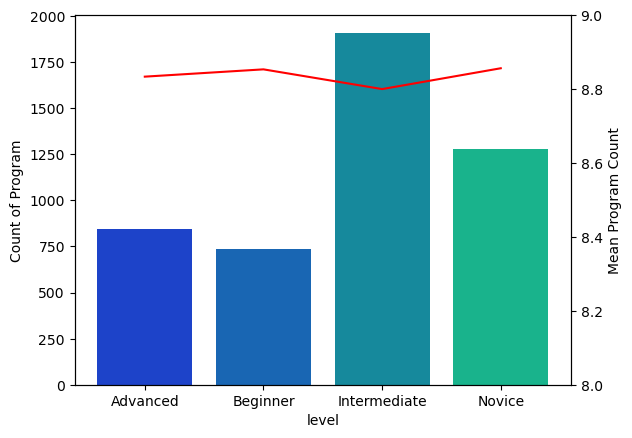

In [65]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.barplot(x='level', y= 'count',hue='level',legend=False,palette='winter', data=cleaned,ax=ax1)
sns.lineplot(x='level', y='mean',data=cleaned,ax=ax2,color='red')
ax2.set_ylim(8.00,9.00)
ax2.set_ylabel('Mean Program Count')
ax1.set_ylabel('Count of Program')
plt.show()

The plot highlights Intermediate level being the most preferred level, surpassing the mean_program_count. 

2.Is there a relationship between the type of equipment required and the total_exercises in a program? Do programs requiring a Full Gym have more exercises than those for a Garage Gym?

In [67]:
df.head(2)

,level,goal,equipment,program_length,time_per_workout,total_exercises,created,last_edit
0,Intermediate,"Muscle&Sculpting, Bodyweight, Fitness",Full Gym,12.0,90.0,384,2024-01-20 10:23:00,2025-06-29 12:39:00
1,"Intermediate, Advanced",Bodybuilding,Full Gym,8.0,60.0,224,2024-07-08 02:28:00,2025-06-18 09:15:00


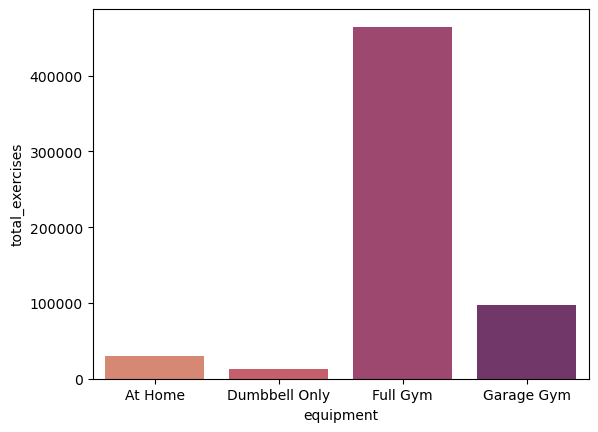

In [96]:
grouped= df.groupby('equipment')['total_exercises'].sum().reset_index()
sns.barplot(x='equipment', y='total_exercises',hue='equipment',legend=False, data=grouped,palette='flare')
plt.show()

The plot shows that Full Gym is the most famous equipment type, showcasing the physical fitness preference and also the most affordable in terms of less equipment required.

3. What are the most common workout goals in the dataset, and what levels are associated with them? For example, is Bodybuilding a goal primarily for Advanced users?

In [68]:
df.head()

,level,goal,equipment,program_length,time_per_workout,total_exercises,created,last_edit
0,Intermediate,"Muscle&Sculpting, Bodyweight, Fitness",Full Gym,12.0,90.0,384,2024-01-20 10:23:00,2025-06-29 12:39:00
1,"Intermediate, Advanced",Bodybuilding,Full Gym,8.0,60.0,224,2024-07-08 02:28:00,2025-06-18 09:15:00
2,"Beginner, Novice, Intermediate","Athletics, Powerlifting, Powerbuilding",Full Gym,6.0,90.0,237,2025-04-23 09:21:00,2025-06-18 11:55:00
3,"Intermediate, Advanced",Powerbuilding,Garage Gym,10.0,70.0,280,2024-09-07 03:44:00,2025-06-18 08:01:00
4,"Intermediate, Advanced","Powerbuilding, Powerlifting, Bodybuilding, Muscle&Sculpting",Full Gym,10.0,80.0,356,2024-12-23 03:13:00,2025-06-18 12:19:00


In [90]:
goals= df['goal'].str.split(', ').explode()
goals
exploded_goal= df.loc[goals.index].copy()
exploded_goal['goal'] = goals.values
common_goals= exploded_goal['goal'].value_counts()
common_goals

goal
Bodybuilding        1719
Muscle&Sculpting     932
Powerbuilding        904
Athletics            536
Powerlifting         494
Bodyweight           322
Fitness              322
Olympic               39
Weightlifting         39
                       8
Name: count, dtype: int64

In [89]:
top_goals= common_goals.index
listed= []
for goal in top_goals:
    rows_df= df[df['goal'].str.contains(goal,na=False)]
    levels= rows_df['level'].str.split(', ').explode().str.strip()
    asso_level= levels.value_counts().reset_index()
    asso_level.columns=['level','count']
    asso_level['goal']= goal
    listed.append(asso_level)

data=pd.concat(listed,ignore_index=True)
req_data= data.drop(index=data.iloc[36:41].index)
req_data

,level,count,goal
0,Intermediate,1304,Bodybuilding
1,Novice,860,Bodybuilding
2,Advanced,619,Bodybuilding
3,Beginner,436,Bodybuilding
4,Intermediate,712,Muscle&Sculpting
5,Novice,497,Muscle&Sculpting
6,Advanced,321,Muscle&Sculpting
7,Beginner,286,Muscle&Sculpting
8,Intermediate,759,Powerbuilding
9,Novice,453,Powerbuilding


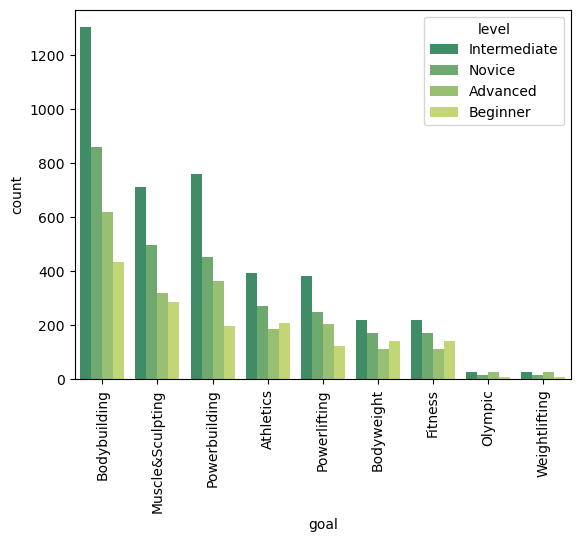

In [95]:
sns.barplot(x='goal', y='count',hue='level',data=req_data, palette='summer')
plt.xticks(rotation='vertical')
plt.show()

In most of the preferred goals, Intermediate type of level stands out. However in cases like olympic and weightlifting we find there is equally strong preference even to advance type, even passing novice level. This highlights the seriousness and more specific level of the goal and thereby the required level to succeed in it.

4. What is the distribution of time_per_workout?

In [110]:
df.head(2)

,level,goal,equipment,program_length,time_per_workout,total_exercises,created,last_edit
0,Intermediate,"Muscle&Sculpting, Bodyweight, Fitness",Full Gym,12.0,90.0,384,2024-01-20 10:23:00,2025-06-29 12:39:00
1,"Intermediate, Advanced",Bodybuilding,Full Gym,8.0,60.0,224,2024-07-08 02:28:00,2025-06-18 09:15:00


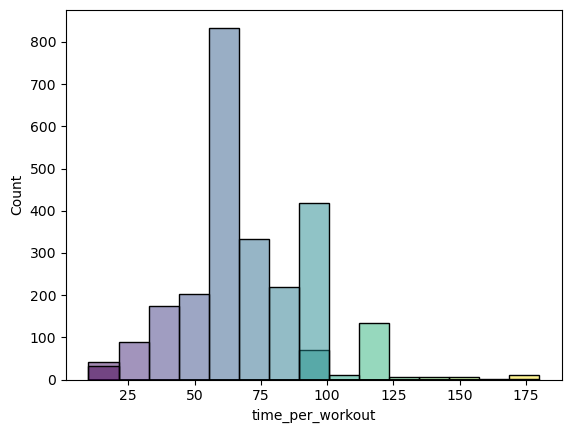

In [108]:
sns.histplot(x='time_per_workout',kde=True, hue='time_per_workout', legend=False,data=df,bins=15,palette='viridis')
plt.show()

Most of the workout last roughly 60 mins, which suits our roughly intermediate level of preferred level. However we also find cases of 175 mins, highlighting mostly the advance level of the workouts.

5. How long, on average, are programs left unedited after they are created?

In [111]:
df.head()

,level,goal,equipment,program_length,time_per_workout,total_exercises,created,last_edit
0,Intermediate,"Muscle&Sculpting, Bodyweight, Fitness",Full Gym,12.0,90.0,384,2024-01-20 10:23:00,2025-06-29 12:39:00
1,"Intermediate, Advanced",Bodybuilding,Full Gym,8.0,60.0,224,2024-07-08 02:28:00,2025-06-18 09:15:00
2,"Beginner, Novice, Intermediate","Athletics, Powerlifting, Powerbuilding",Full Gym,6.0,90.0,237,2025-04-23 09:21:00,2025-06-18 11:55:00
3,"Intermediate, Advanced",Powerbuilding,Garage Gym,10.0,70.0,280,2024-09-07 03:44:00,2025-06-18 08:01:00
4,"Intermediate, Advanced","Powerbuilding, Powerlifting, Bodybuilding, Muscle&Sculpting",Full Gym,10.0,80.0,356,2024-12-23 03:13:00,2025-06-18 12:19:00


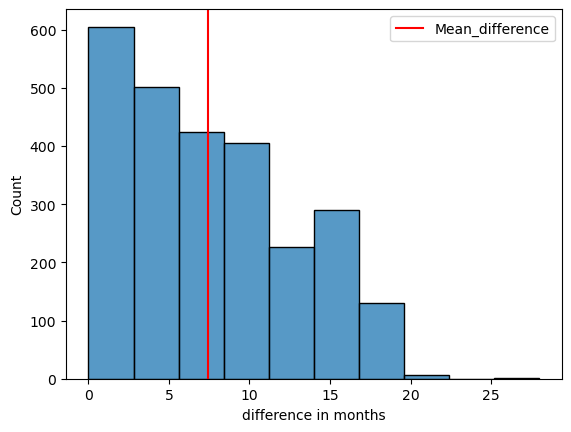

In [132]:
timedelta= df.copy()
timedelta['diff']= (df['last_edit'].dt.year - df['created'].dt.year)*12 + (df['last_edit'].dt.month - df['created'].dt.month)
avg= timedelta['diff'].mean()
sns.histplot(x='diff',data=timedelta,bins=10)
plt.axvline(avg, color='red',label='Mean_difference')
plt.xlabel('difference in months')
plt.legend()
plt.show()


On an average, the differnce in time 'created' and 'last edit' ranges around 7.5 months. However there is good variation and we find all other values of months that are before and after the mean difference.

Thank You!